# Shapes
Images of shapes used to test digital image processing functions. 
In Python an image is usually represented as a two-dimensional array so in order to build an image of a geometric shape we have to compute the coordinates x and y of the shape as integer values for the rows and columns of the pixels and give to those points a value, e.g. 0 for black and 255 for white. This notebook contains the functions for lines and circles. Being images two-dimensional arrays, images of lines and circles can be added multiple times to one image if the size of all the images are the same.

In [2]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

## Line

In [5]:
def dip_line(x1, y1, x2, y2):
    '''
    Creates an image of a line segment given its two endpoints (x1, y1) and (x2, y2)
    1) Computes the value of the slope and intercept
    2) Computes the value of the segment's x and y as integer variables
    3) Creates a 2-dimensional array of points (x, y) of the line
    4) Creates a two-dimensional array of the image
    5) Adds the points to the empty image
    6) Returns the image
    '''
    scale = 1
    size_image = 500
    num_points = 1000
    
    X = np.linspace(x1, x2, num_points)
    slope = (y2 - y1) / (x2 - x1)
    intercept = y2 - slope * x2
    Y = slope * X + intercept
    
    X = np.rint(scale * X).astype(int) # row index of the line's pixels in the image two-dimensional array
    Y = np.rint(scale * Y).astype(int) # column index of the line's pixels in the image two dimensional array
    
    points = np.zeros((num_points, 2), dtype=int)
    for i in range(0, num_points):
        points[i, 0] = X[i]
        points[i, 1] = Y[i]
    
    image = np.zeros((size_image, size_image)) 
    for i in range(0, num_points):
        row = points[i, 1]
        col = points[i, 0]
        image[row, col] = 255
    
    return image

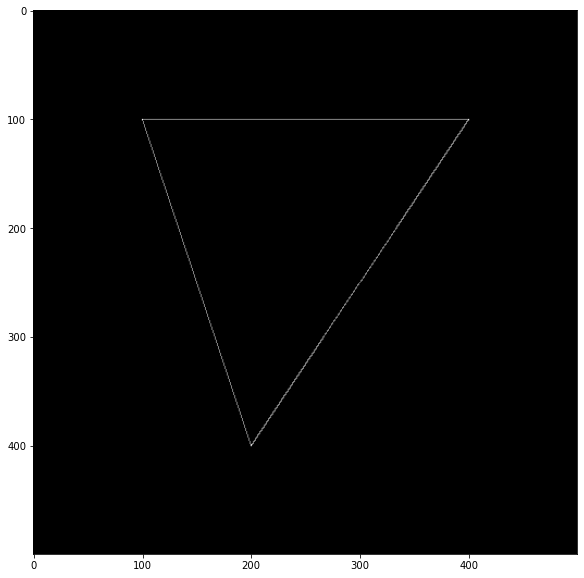

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
line1 = dip_line(100, 100, 200, 400)
line2 = dip_line(100, 100, 400, 100)
line3 = dip_line(200, 400, 400, 100)
lines = line1 + line2 + line3
ax.imshow(lines, cmap=cm.gray)

## Circle

In [47]:
def dip_circle(a, b, r):
    '''
    Creates an image of a circular shape given its center (a,b) and radius r.
    1) Computes the value of the x and y as integer variables
    2) Creates a 2-dimensional array of points (x, y) of the circle
    3) Creates a two-dimensional array of the image
    4) Adds the points to the empty image
    5) Returns the image
    '''
    scale = 100
    num_points = 3600
    size_image = 500
    theta = np.linspace(-np.pi, np.pi, num_points)

    X = a + r * np.cos(theta)
    Y = b + r * np.sin(theta)
    X = np.rint(scale * X).astype(int) # row index of the circle's pixels in the image two-dimensional array
    Y = np.rint(scale * Y).astype(int) # column index of the circle's pixels in the image two dimensional array
    
    points = np.zeros((num_points, 2), dtype=int)
    for i in range(0, num_points):
        points[i, 0] = X[i]
        points[i, 1] = Y[i]

    image = np.zeros((size_image, size_image))
    for i in range(0, num_points):
        row = points[i, 1]
        col = points[i, 0]
        image[row, col] = 255
    return image

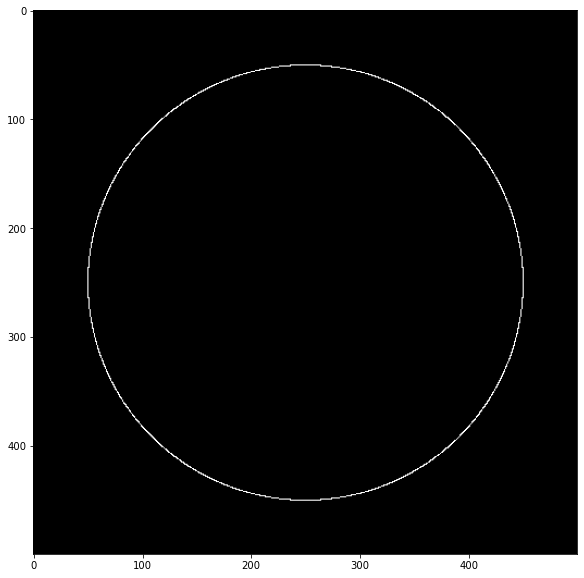

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
circle = dip_circle(2.5, 2.5, 2)
ax.imshow(circle, cmap=cm.gray)